In [21]:
import pandas as pd
import numpy as np

In [3]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

# Отображение графика

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

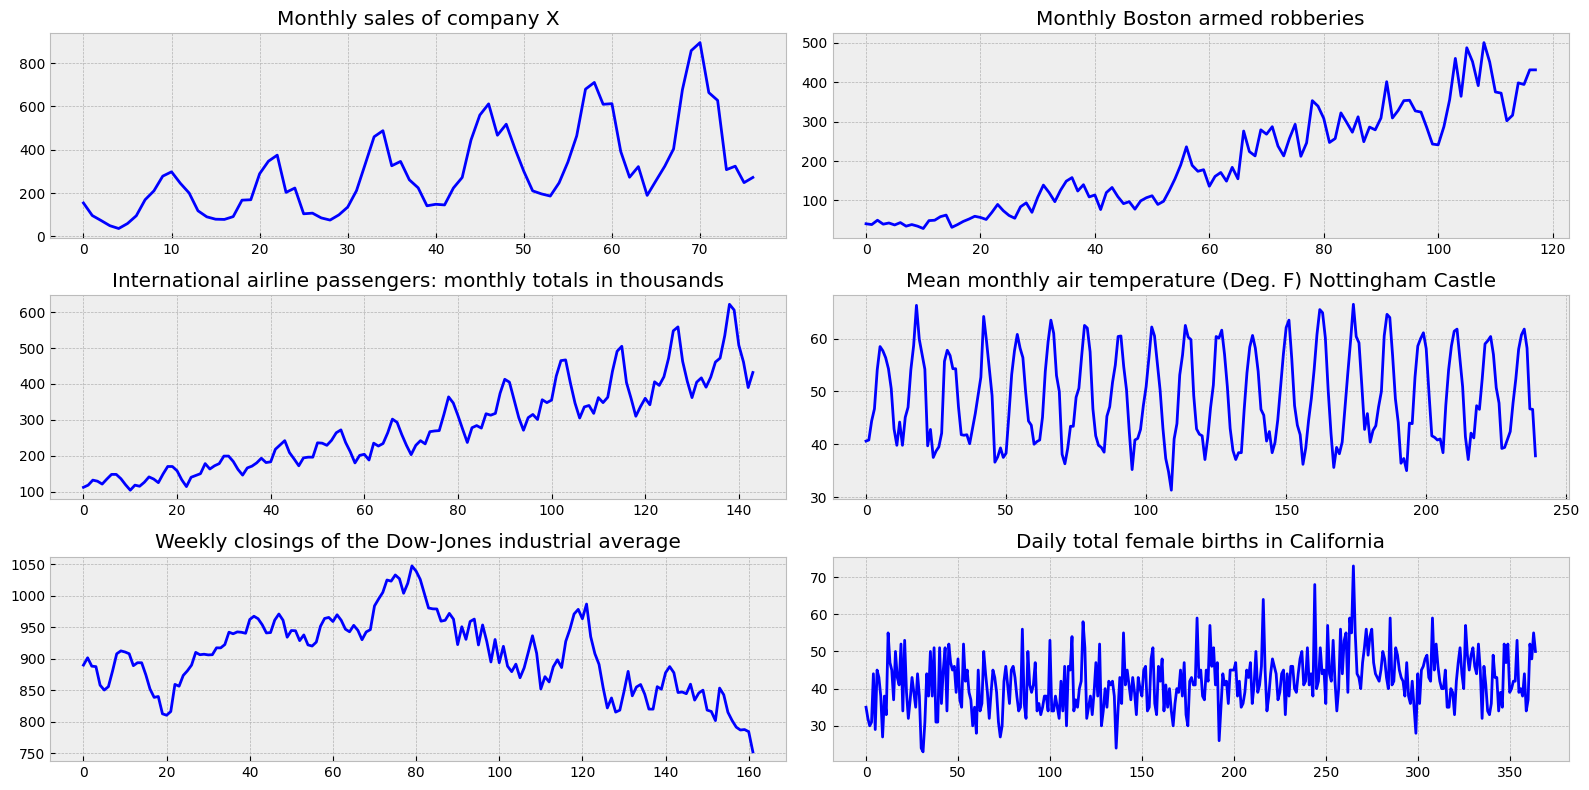

In [7]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Ищем сезонность

In [60]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from scipy.signal import periodogram

# Данные
def make_analys(series):
    data = series
    # 1. Визуализация
    plt.figure(figsize=(10, 4))
    plt.plot(data, label='Monthly Boston Armed Robberies')
    plt.title('Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2. Декомпозиция
    result = seasonal_decompose(data, model='additive', period=12)
    result.plot()
    plt.show()

    # 3. ACF
    plot_acf(data, lags=40)
    plt.title('Autocorrelation Function')
    plt.show()

    # 4. Периодограмма
    f, Pxx = periodogram(data, fs=1.0)
    plt.plot(f, Pxx)
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.title('Periodogram')
    plt.grid(True)
    plt.show()

# Тест Дики-Фуллера 

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries, print_output=True):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    # 5 значение icbest Лучшее значение информационного критерия (AIC), использованное для выбора лага. Обычно не трактуется отдельно.
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']) 
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    if print_output:
        print(dfoutput)
    return dfoutput

## Приводим временные ряды к стационарности

1
Monthly sales of company X
Results of Dickey-Fuller Test:


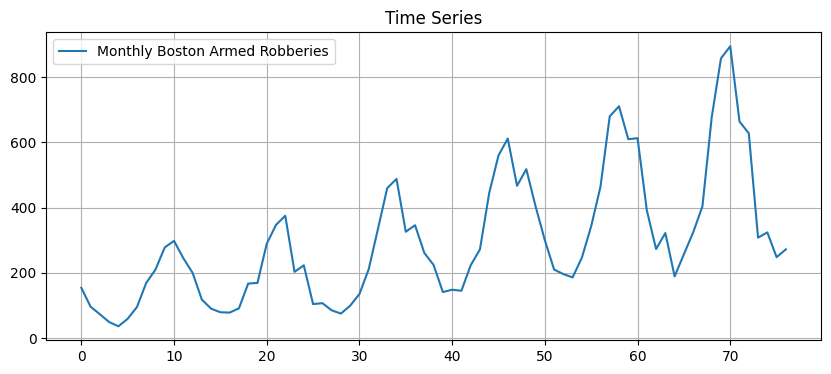

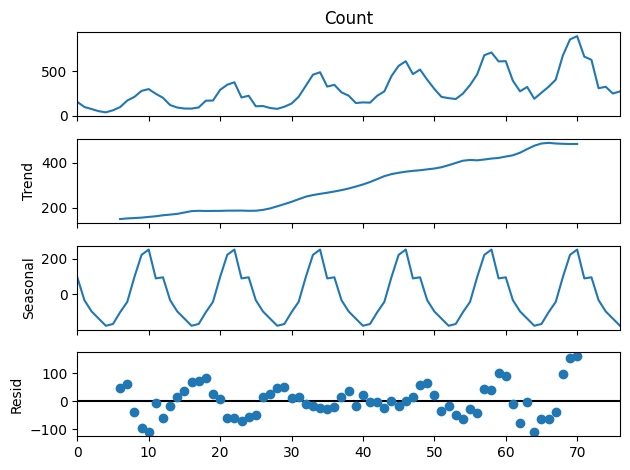

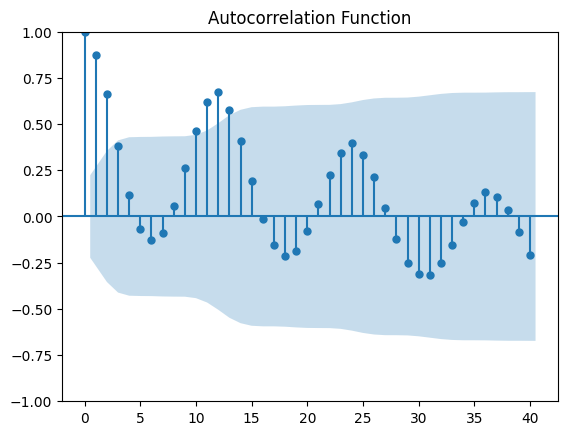

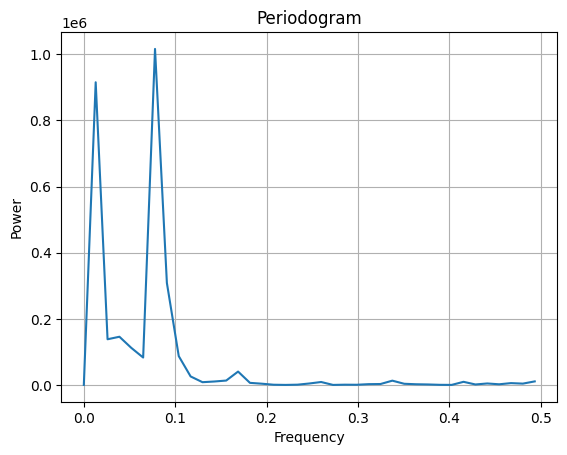

Временной ряд Monthly sales of company X не является стационарным. p-value = 0.99
 
Results of Dickey-Fuller Test:
Временной ряд Monthly sales of company X не является стационарным. p-value = 0.10
 
Results of Dickey-Fuller Test:
Временной ряд Monthly sales of company X  является стационарным. p-value = 0.00
Количество дифференциаций = 2
Test Statistic                -9.193734e+00
p-value                        2.089629e-15
#Lags Used                     1.100000e+01
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64
********************
 
2
Monthly Boston armed robberies
Results of Dickey-Fuller Test:


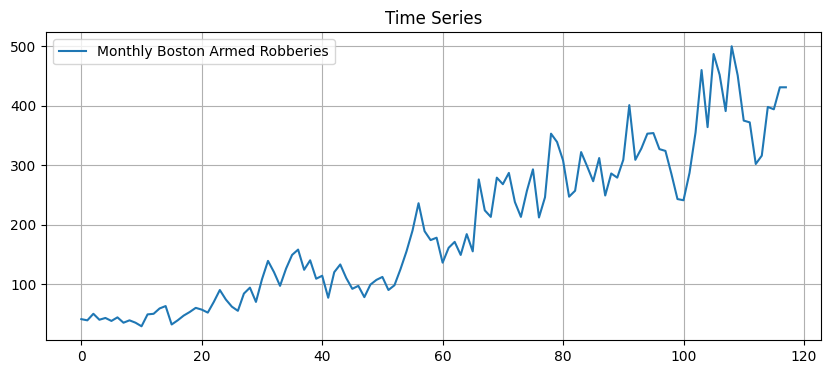

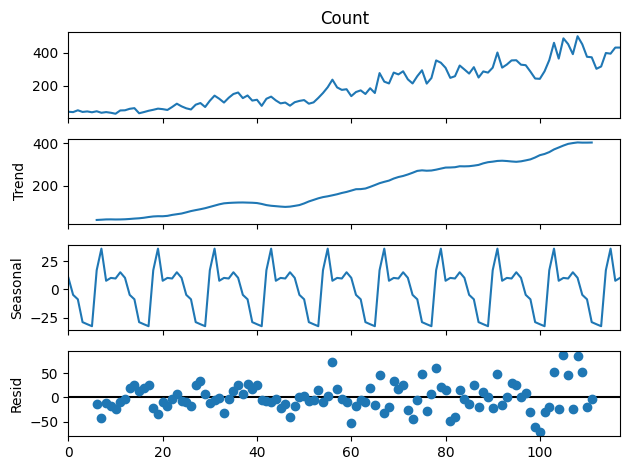

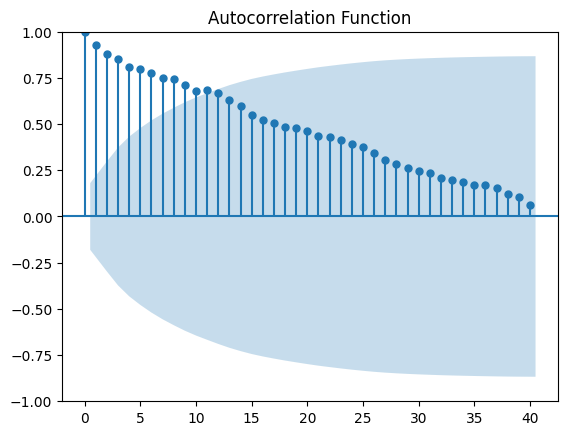

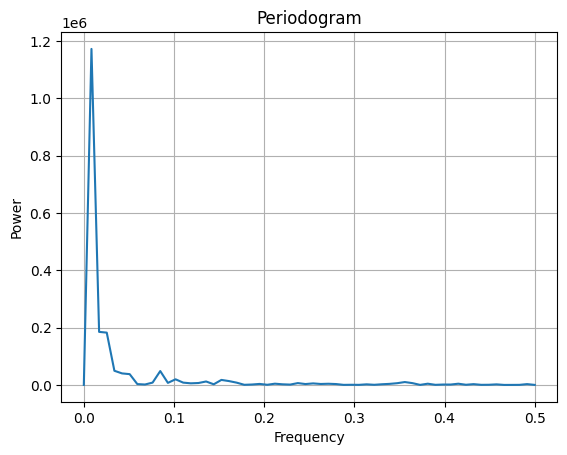

Временной ряд Monthly Boston armed robberies не является стационарным. p-value = 0.99
 
Results of Dickey-Fuller Test:
Временной ряд Monthly Boston armed robberies  является стационарным. p-value = 0.00
Количество дифференциаций = 1
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64
********************
 
3
International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:


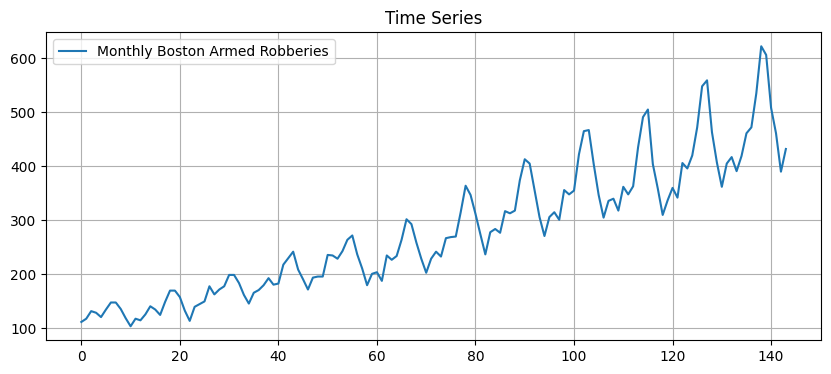

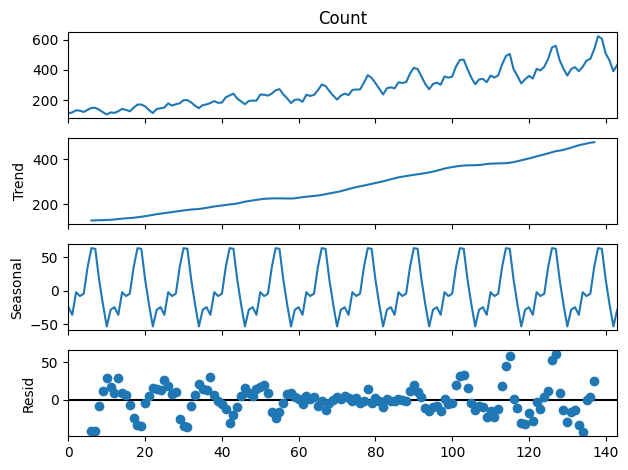

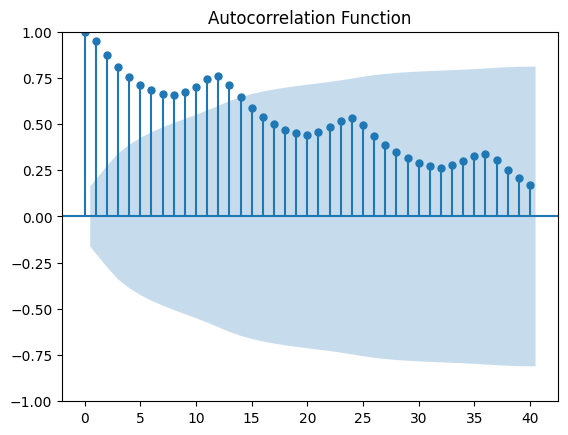

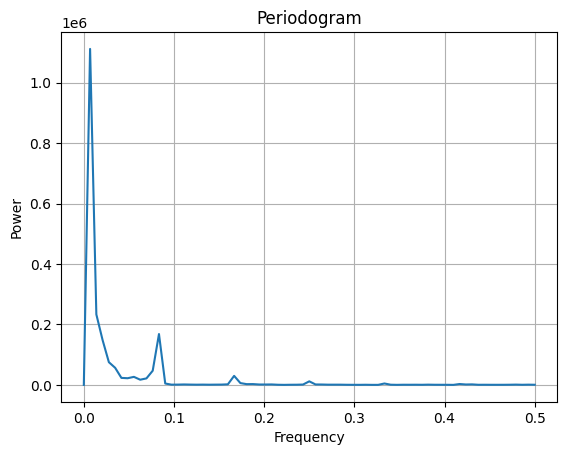

Временной ряд International airline passengers: monthly totals in thousands не является стационарным. p-value = 0.99
 
Results of Dickey-Fuller Test:
Временной ряд International airline passengers: monthly totals in thousands не является стационарным. p-value = 0.05
 
Results of Dickey-Fuller Test:
Временной ряд International airline passengers: monthly totals in thousands  является стационарным. p-value = 0.00
Количество дифференциаций = 2
Test Statistic                -1.638423e+01
p-value                        2.732892e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64
********************
 
4
Mean monthly air temperature (Deg. F) Nottingham Castle
Results of Dickey-Fuller Test:


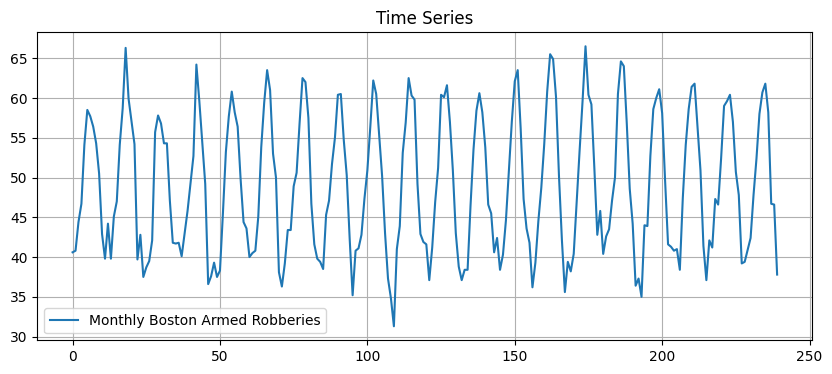

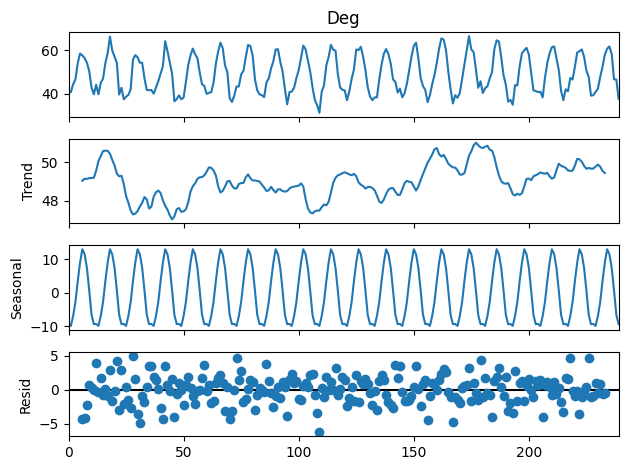

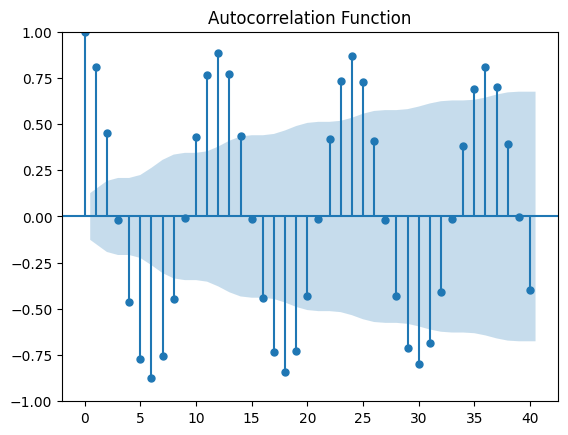

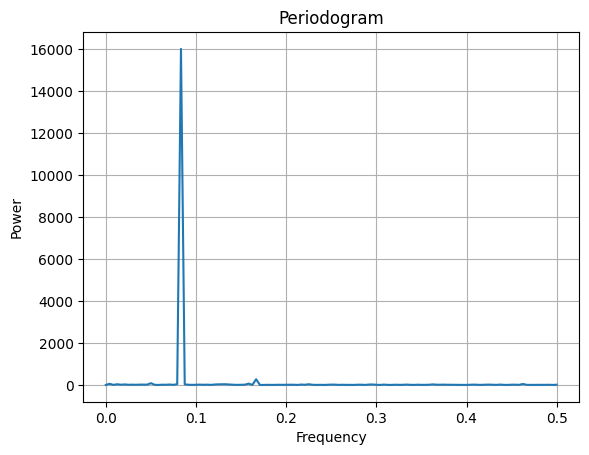

Временной ряд Mean monthly air temperature (Deg. F) Nottingham Castle  является стационарным. p-value = 0.02
Количество дифференциаций = 0
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64
********************
 
5
Weekly closings of the Dow-Jones industrial average
Results of Dickey-Fuller Test:


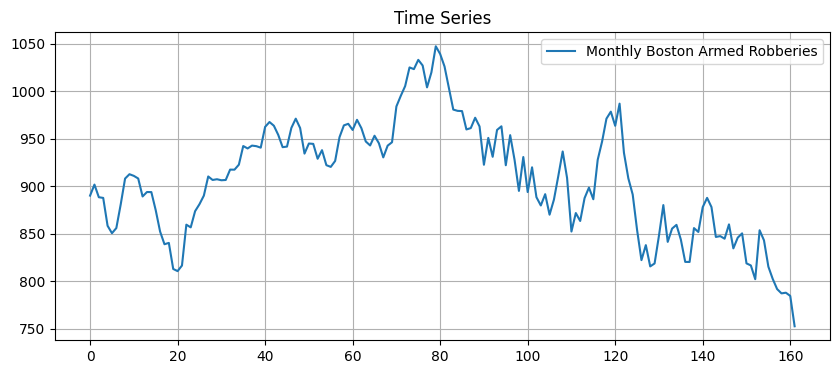

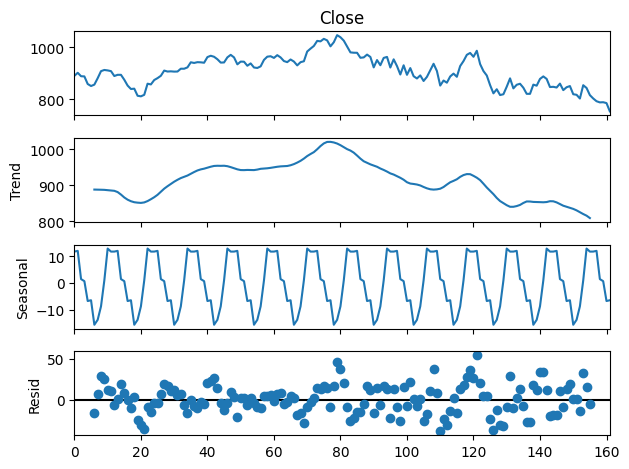

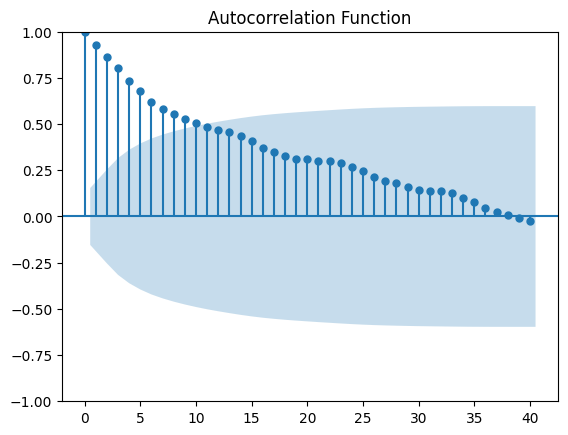

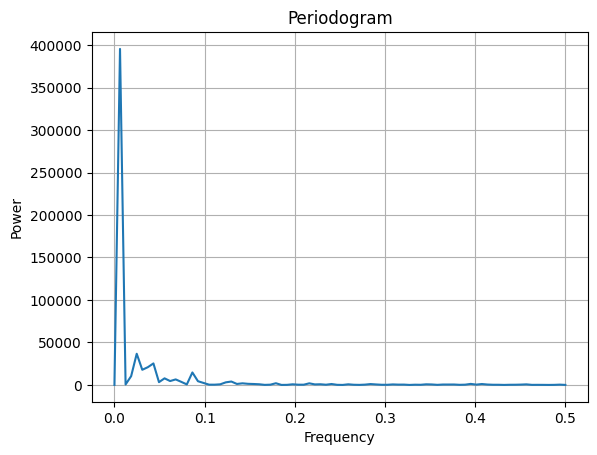

Временной ряд Weekly closings of the Dow-Jones industrial average не является стационарным. p-value = 0.62
 
Results of Dickey-Fuller Test:
Временной ряд Weekly closings of the Dow-Jones industrial average  является стационарным. p-value = 0.00
Количество дифференциаций = 1
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64
********************
 
6
Daily total female births in California
Results of Dickey-Fuller Test:


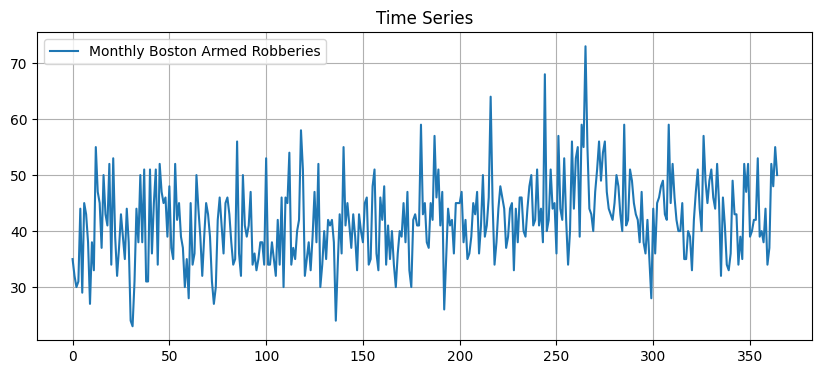

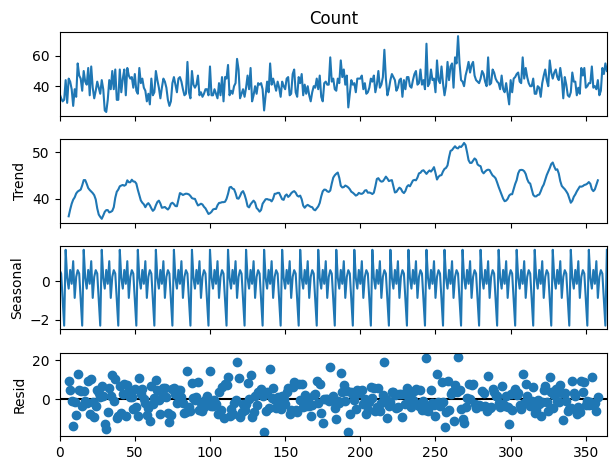

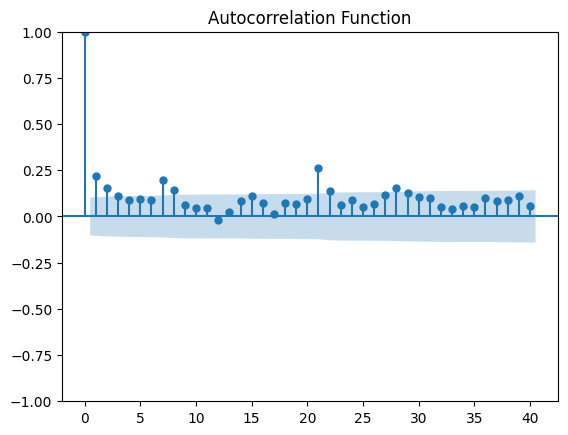

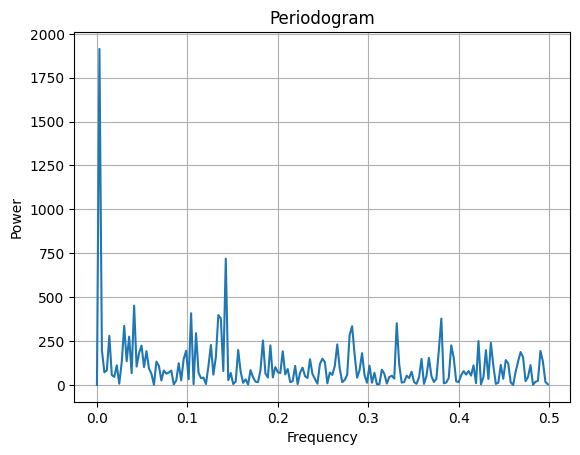

Временной ряд Daily total female births in California  является стационарным. p-value = 0.00
Количество дифференциаций = 0
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
********************
 


In [61]:
for idx, series_name in enumerate(all_series.keys(),1):
    print(idx)
    print(series_name)
    dfoutput = test_stationarity(all_series[series_name], print_output=False)
    make_analys(all_series[series_name])

    num_diff = 0
    while dfoutput['p-value']>=0.05:
        print(f'Временной ряд {series_name} не является стационарным. p-value = {dfoutput['p-value']:.2f}')
        print(' ')
        num_diff += 1
        diff_series = np.diff(all_series[series_name],num_diff)
        dfoutput = test_stationarity(diff_series, print_output=False)
        if dfoutput['p-value']<=0.05:
            continue

    print(f'Временной ряд {series_name}  является стационарным. p-value = {dfoutput['p-value']:.2f}')
    print(f'Количество дифференциаций = {num_diff}')
    print(dfoutput)
    print('*'*20)
    print(' ')
